In [1]:
import numpy as np 
import random, os
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

In [28]:
weather_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv'
save_path = r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\savedData\CAISO_zone_1_.csv'

In [29]:
data = pd.read_csv(weather_path, delimiter = ',')

In [10]:
energy_path = r'C:\Users\super\Downloads\eia8602019\3_3_Solar_Y2019.csv'
energy_PP_data = pd.read_csv(energy_path, delimiter = ',', skiprows=[0])

In [11]:
energy_PP_data.head()

,Utility ID,Utility Name,Plant Code,Plant Name,State,County,Generator ID,Status,Technology,Prime Mover,...,Crystalline Silicon?,Thin-Film (CdTe)?,Thin-Film (A-Si)?,Thin-Film (CIGS)?,Thin-Film (Other)?,Other Materials?,Net Metering Agreement?,Net Metering DC Capacity (MW),Virtual Net Metering Agreement?,Virtual Net Metering DC Capacity (MW)
0,16572,Salt River Project,141,Agua Fria,AZ,Maricopa,PV-3,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
1,18454,Tampa Electric Co,645,Big Bend,FL,Hillsborough,1,OP,Solar Photovoltaic,PV,...,NaN,Y,NaN,NaN,NaN,NaN,N,,N,
2,7095,City of Geneseo - (IL),944,Geneseo,IL,Henry,12,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
3,16179,Rochelle Municipal Utilities,960,North Ninth Street,IL,Ogle,SOL1,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,Y,0.3,N,
4,14201,City of Osage - (IA),1172,Osage (IA),IA,Mitchell,SO,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,


In [13]:
CAISO_energy_PP_data = energy_PP_data[energy_PP_data['State'] == 'CA']
CAISO_energy_PP_data.head()

,Utility ID,Utility Name,Plant Code,Plant Name,State,County,Generator ID,Status,Technology,Prime Mover,...,Crystalline Silicon?,Thin-Film (CdTe)?,Thin-Film (A-Si)?,Thin-Film (CIGS)?,Thin-Film (Other)?,Other Materials?,Net Metering Agreement?,Net Metering DC Capacity (MW),Virtual Net Metering Agreement?,Virtual Net Metering DC Capacity (MW)
17,60246,"Sunray Energy 2, LLC",10437,Sunray 2,CA,San Bernardino,SUN2,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
18,60247,Sunray Energy 3 LLC,10438,Sunray 3,CA,San Bernardino,SUN3,OP,Solar Photovoltaic,PV,...,Y,NaN,NaN,NaN,NaN,NaN,N,,N,
19,55711,FPL Energy Operating Services Inc - SEGS,10439,SEGS III,CA,San Bernardino,GEN1,OS,Solar Thermal without Energy Storage,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,X,,X,
20,55711,FPL Energy Operating Services Inc - SEGS,10440,SEGS IV,CA,San Bernardino,GEN1,OS,Solar Thermal without Energy Storage,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,X,,X,
21,55711,FPL Energy Operating Services Inc - SEGS,10441,SEGS V,CA,San Bernardino,GEN1,OS,Solar Thermal without Energy Storage,ST,...,NaN,NaN,NaN,NaN,NaN,NaN,X,,X,


In [15]:
total_capacity = CAISO_energy_PP_data['Nameplate Capacity (MW)'].sum()
print(total_capacity)

12795.400000000001


In [34]:
import pandas as pd

# Paths to the CSV files
file_paths = [
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_1_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_2_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_3_.csv',
    r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_zone_4_.csv'
]

# Read the CSV files into DataFrames
dfs = [pd.read_csv(file_path) for file_path in file_paths]

# Ensure all DataFrames have the same columns and are aligned by index
for df in dfs:
    df.set_index('time', inplace=True)

# Concatenate the DataFrames along the columns
combined_df = pd.concat(dfs, axis=1)

# Calculate the mean for each row across the DataFrames
mean_df = combined_df.groupby(combined_df.columns, axis=1).mean()

# Reset the index to make 'time' a column again
mean_df.reset_index(inplace=True)

# Save the combined DataFrame to a new CSV file
mean_df.to_csv(r'D:\super\Documents\Documents\aiCLub\PSML\Minute-level Load and Renewable\CAISO_combined_mean.csv', index=False)


C:\Users\super\AppData\Local\Temp\ipykernel_7688\3686384384.py:22: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  mean_df = combined_df.groupby(combined_df.columns, axis=1).mean()


                  time  DHI  DNI  Dew Point  GHI  Relative Humidity  \
0  2018-01-01 00:00:00  0.0  0.0      1.175  0.0              56.54   
1  2018-01-01 00:01:00  0.0  0.0      1.180  0.0              56.54   
2  2018-01-01 00:02:00  0.0  0.0      1.185  0.0              56.54   
3  2018-01-01 00:03:00  0.0  0.0      1.190  0.0              56.54   
4  2018-01-01 00:04:00  0.0  0.0      1.195  0.0              56.54   

   Solar Zenith Angle  Temperature  Wind Speed  load_power  solar_power  \
0            167.5675       11.125       1.175    0.873470          0.0   
1            167.5520       11.130       1.175    0.873133          0.0   
2            167.5365       11.135       1.175    0.872795          0.0   
3            167.5210       11.140       1.175    0.872457          0.0   
4            167.5055       11.145       1.175    0.872120          0.0   

   wind_power  
0    0.005142  
1    0.005093  
2    0.005045  
3    0.004997  
4    0.004948  


In [35]:
mean_df.head()

,time,DHI,DNI,Dew Point,GHI,Relative Humidity,Solar Zenith Angle,Temperature,Wind Speed,load_power,solar_power,wind_power
0,2018-01-01 00:00:00,0.0,0.0,1.175,0.0,56.54,167.5675,11.125,1.175,0.873470,0.0,0.005142
1,2018-01-01 00:01:00,0.0,0.0,1.180,0.0,56.54,167.5520,11.130,1.175,0.873133,0.0,0.005093
2,2018-01-01 00:02:00,0.0,0.0,1.185,0.0,56.54,167.5365,11.135,1.175,0.872795,0.0,0.005045
3,2018-01-01 00:03:00,0.0,0.0,1.190,0.0,56.54,167.5210,11.140,1.175,0.872457,0.0,0.004997
4,2018-01-01 00:04:00,0.0,0.0,1.195,0.0,56.54,167.5055,11.145,1.175,0.872120,0.0,0.004948


In [36]:
attributes= ["time", "solar_power", "GHI", "DHI", "DNI", "Solar Zenith Angle", "wind_power", "load_power", "Temperature", "Relative Humidity", "Wind Speed"]
date_format = '%Y-%m-%d %H:%M:%S'
df = pd.DataFrame(data[attributes])
df['time'] = pd.to_datetime(df['time'], format=date_format)

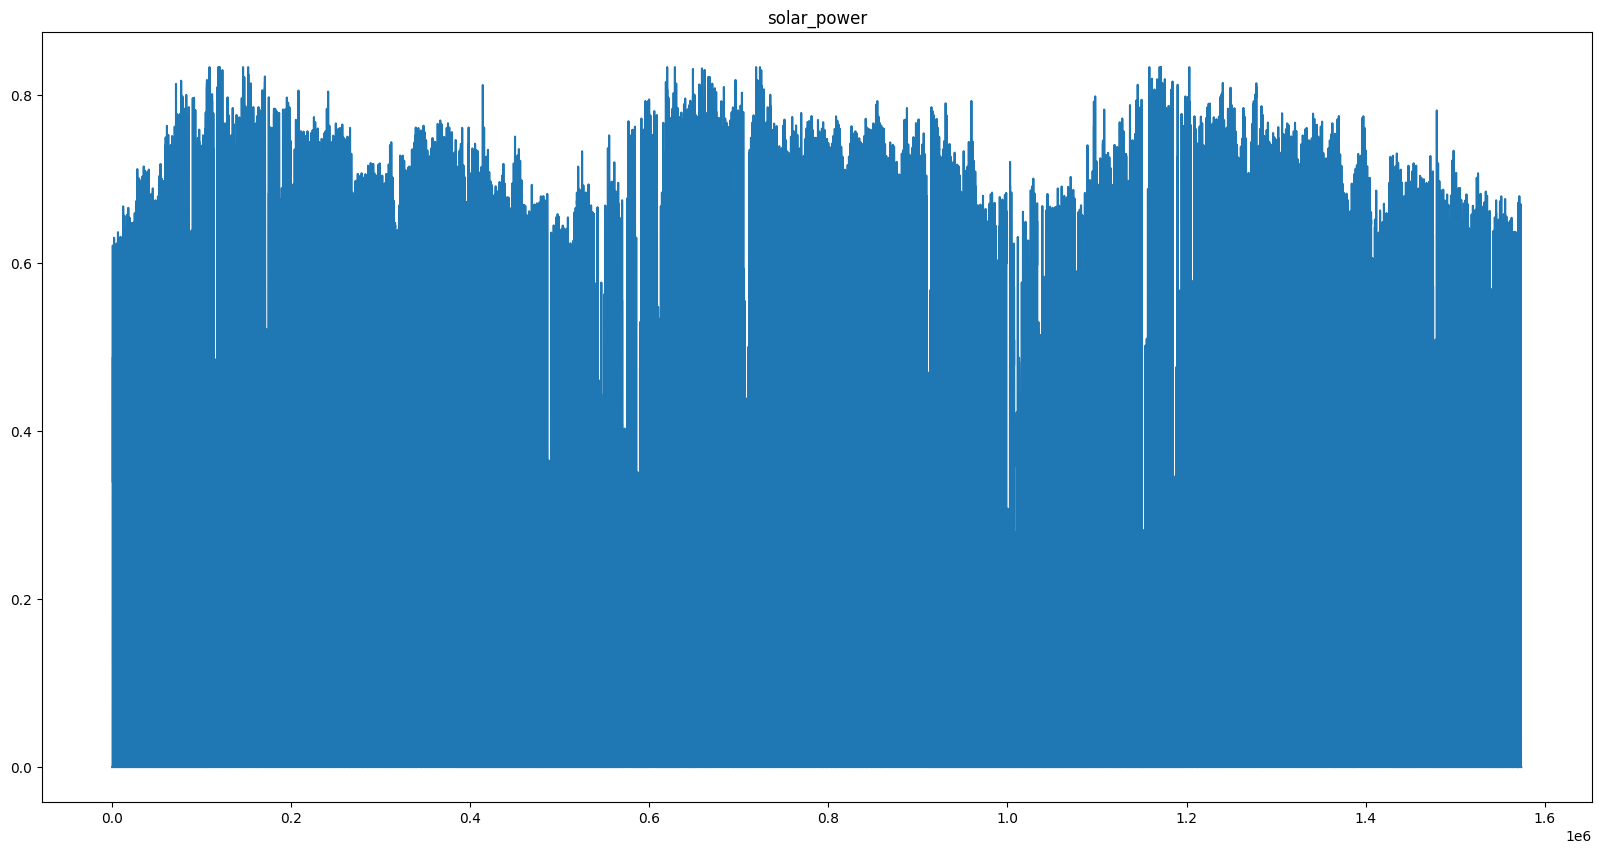

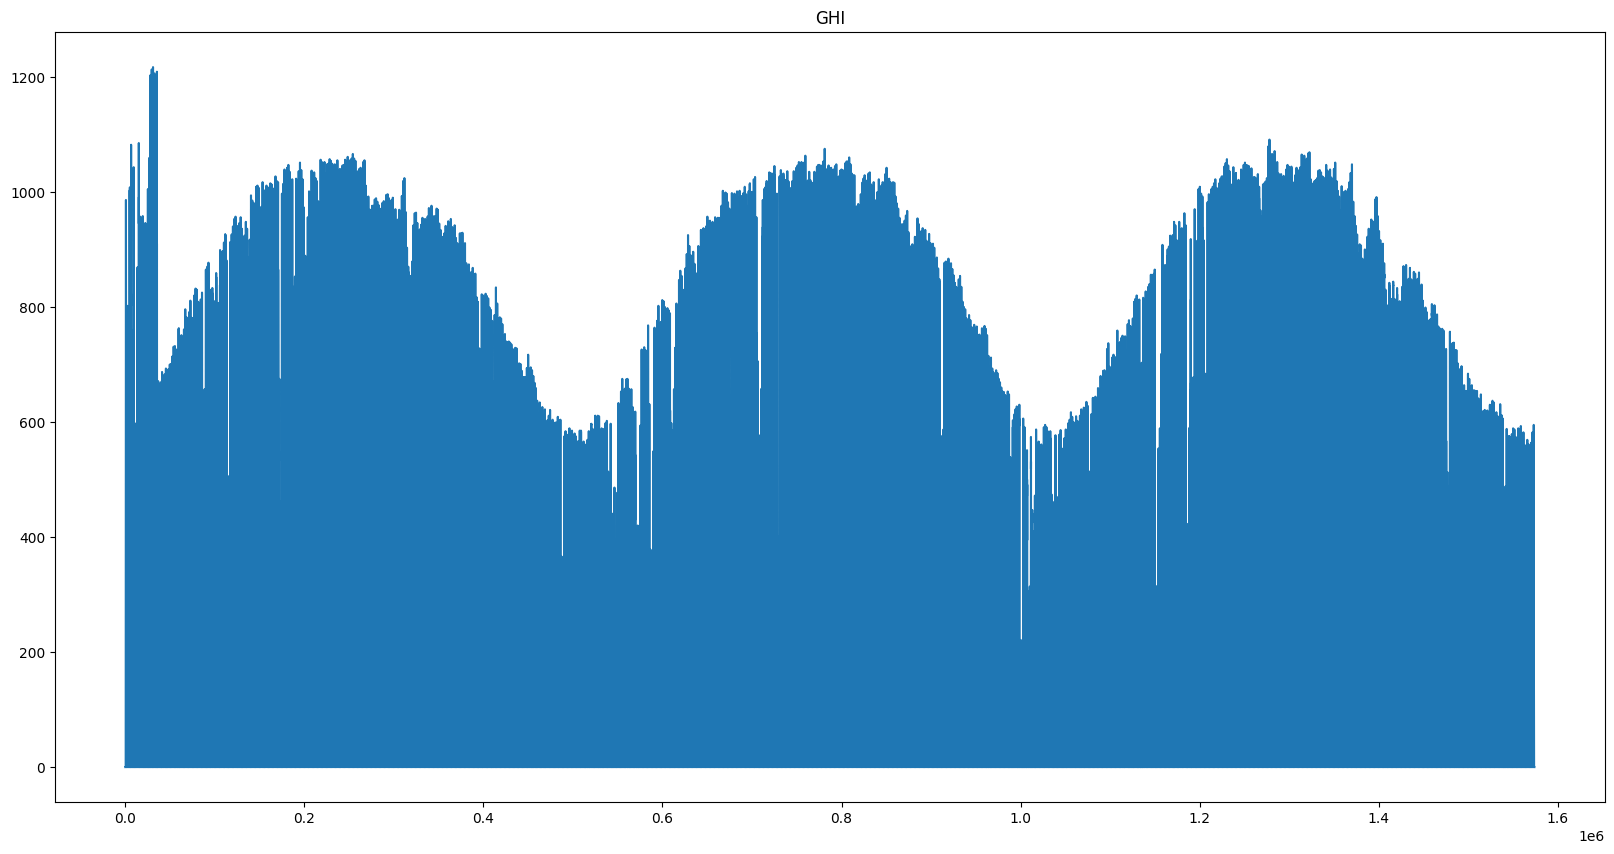

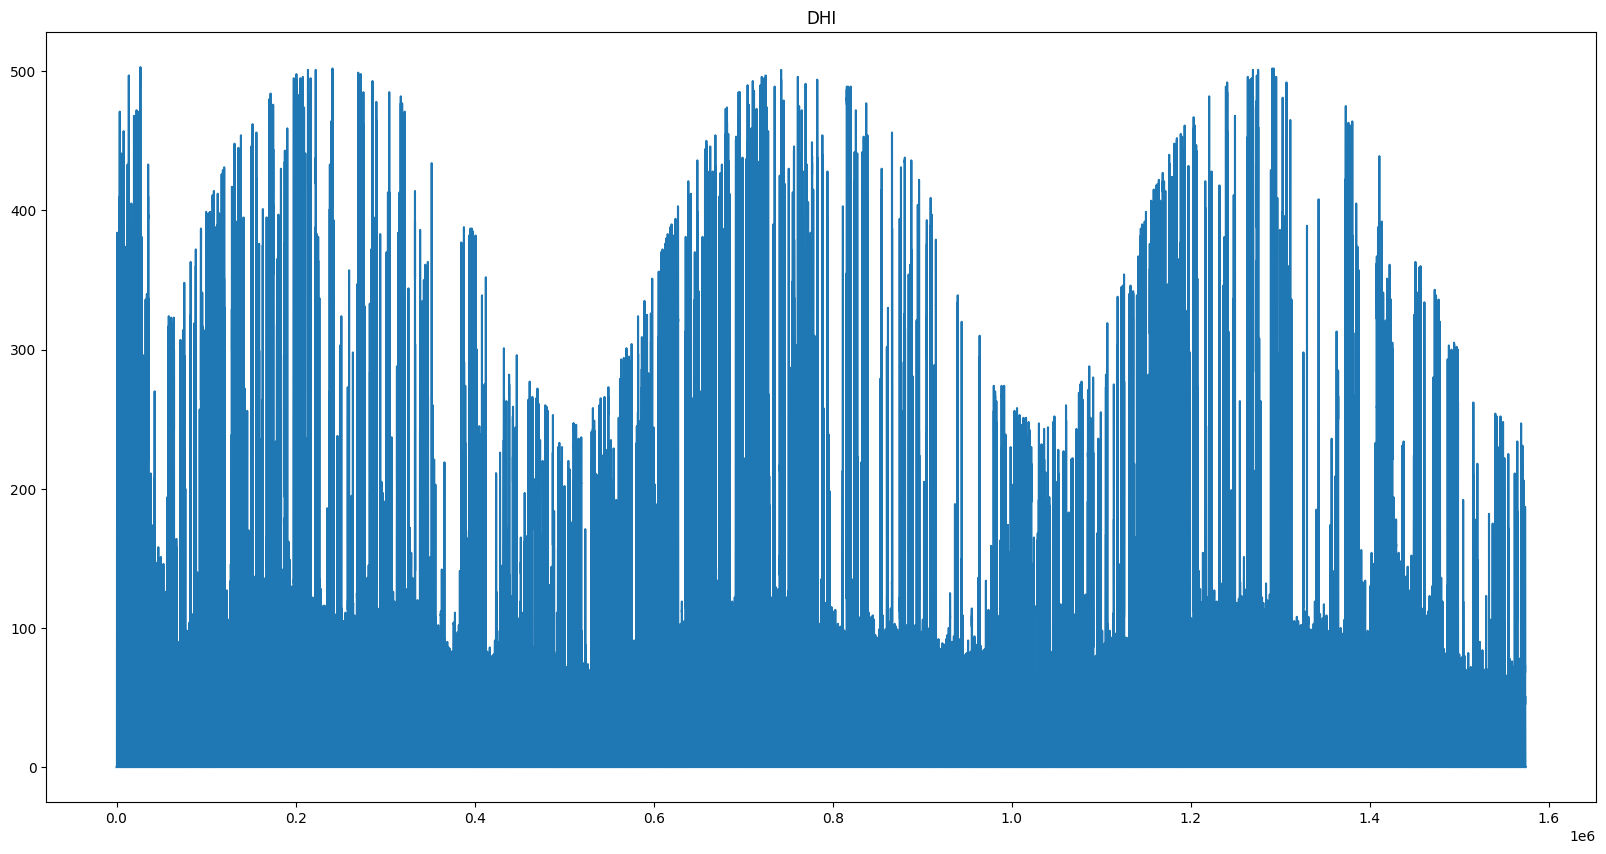

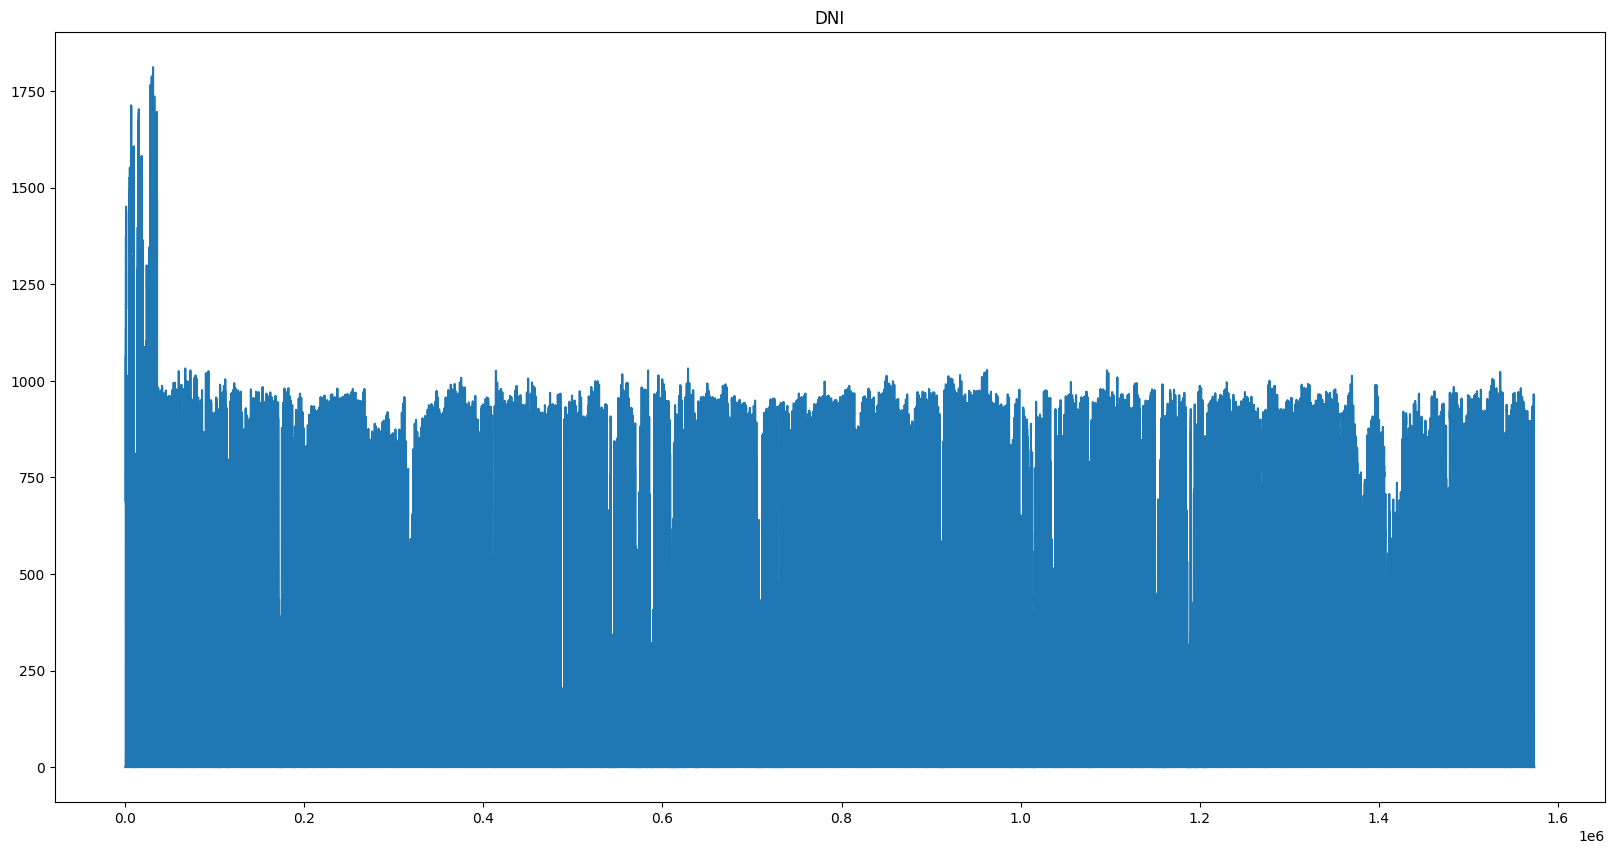

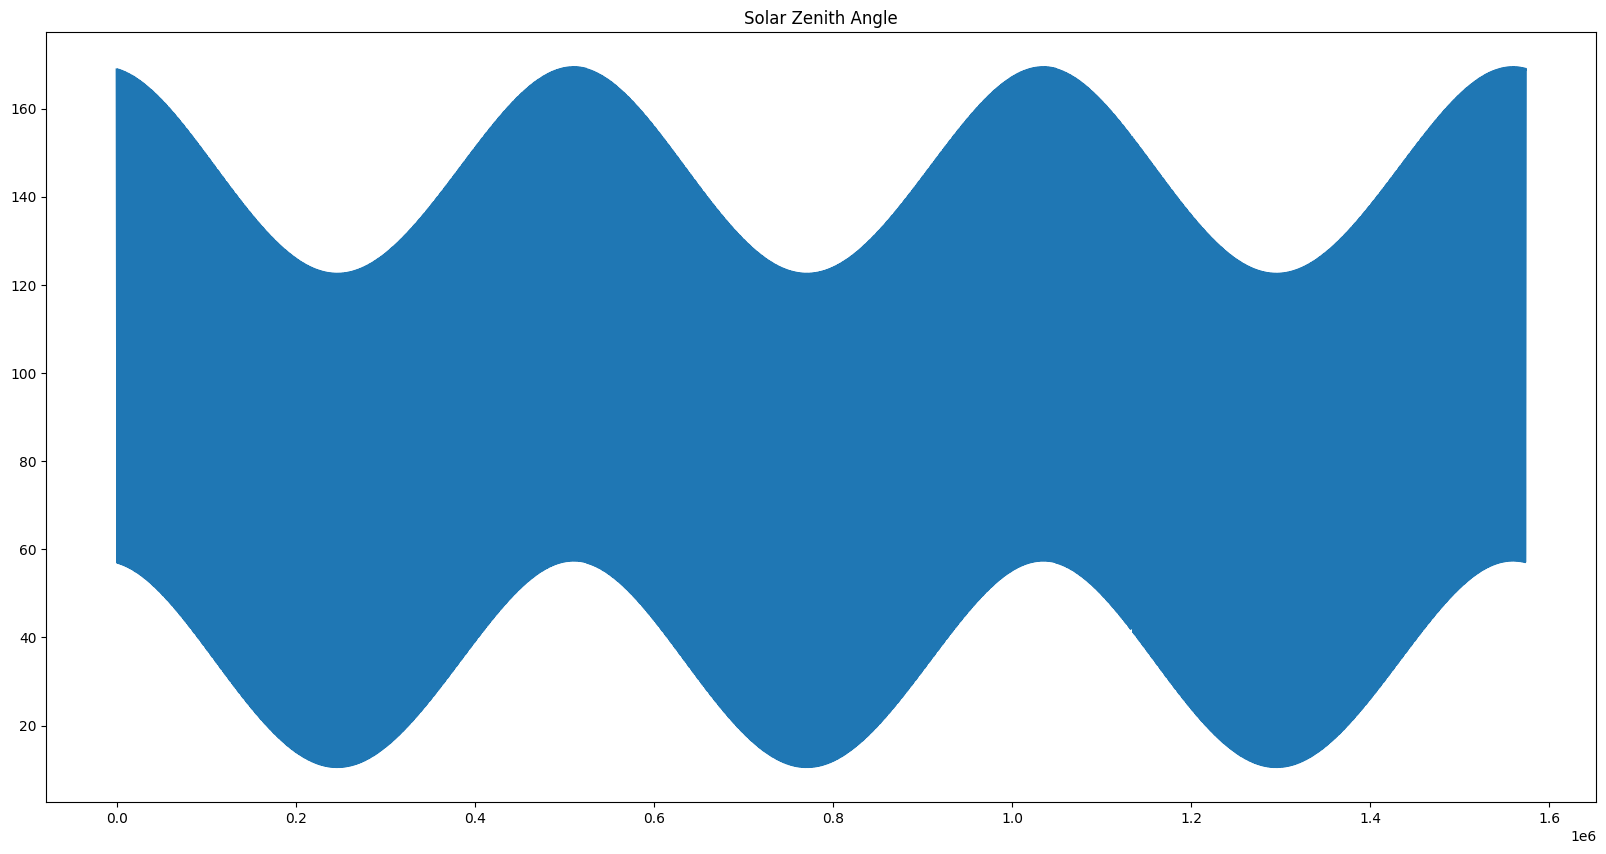

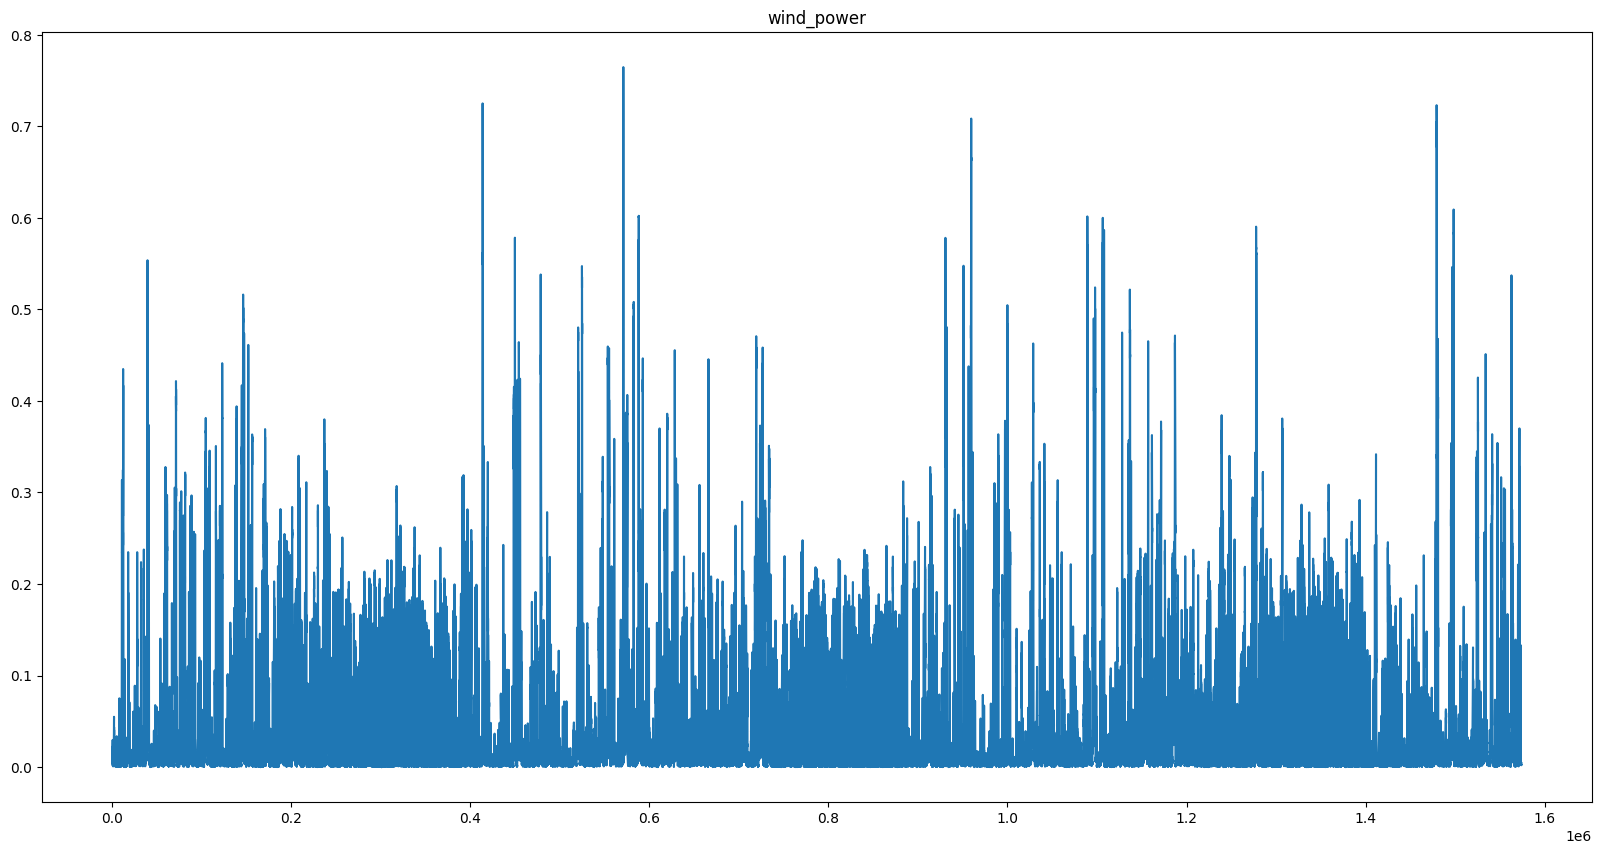

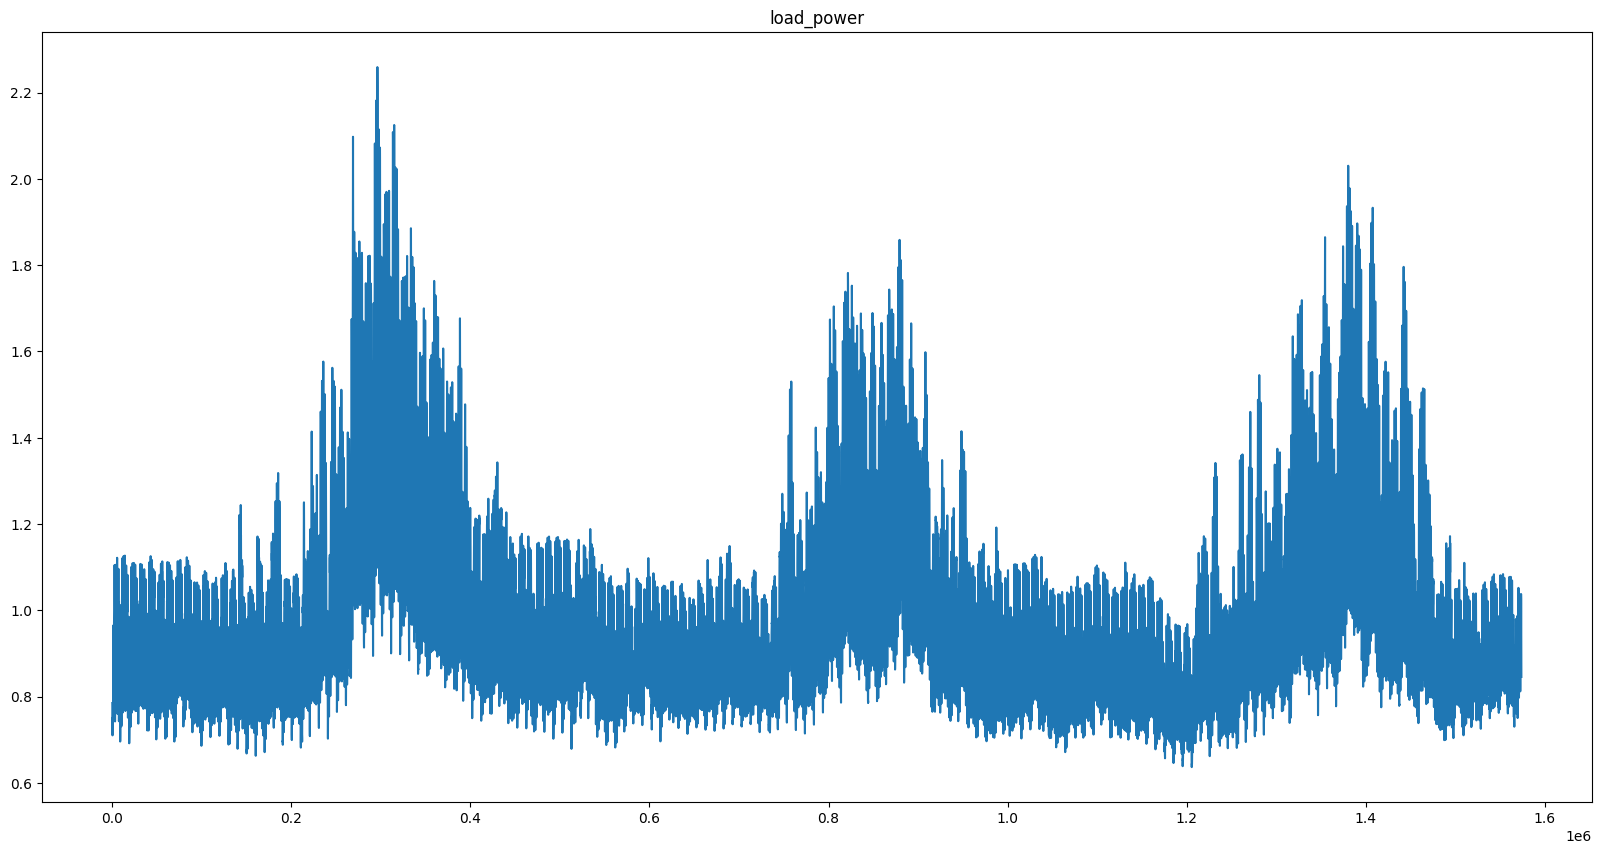

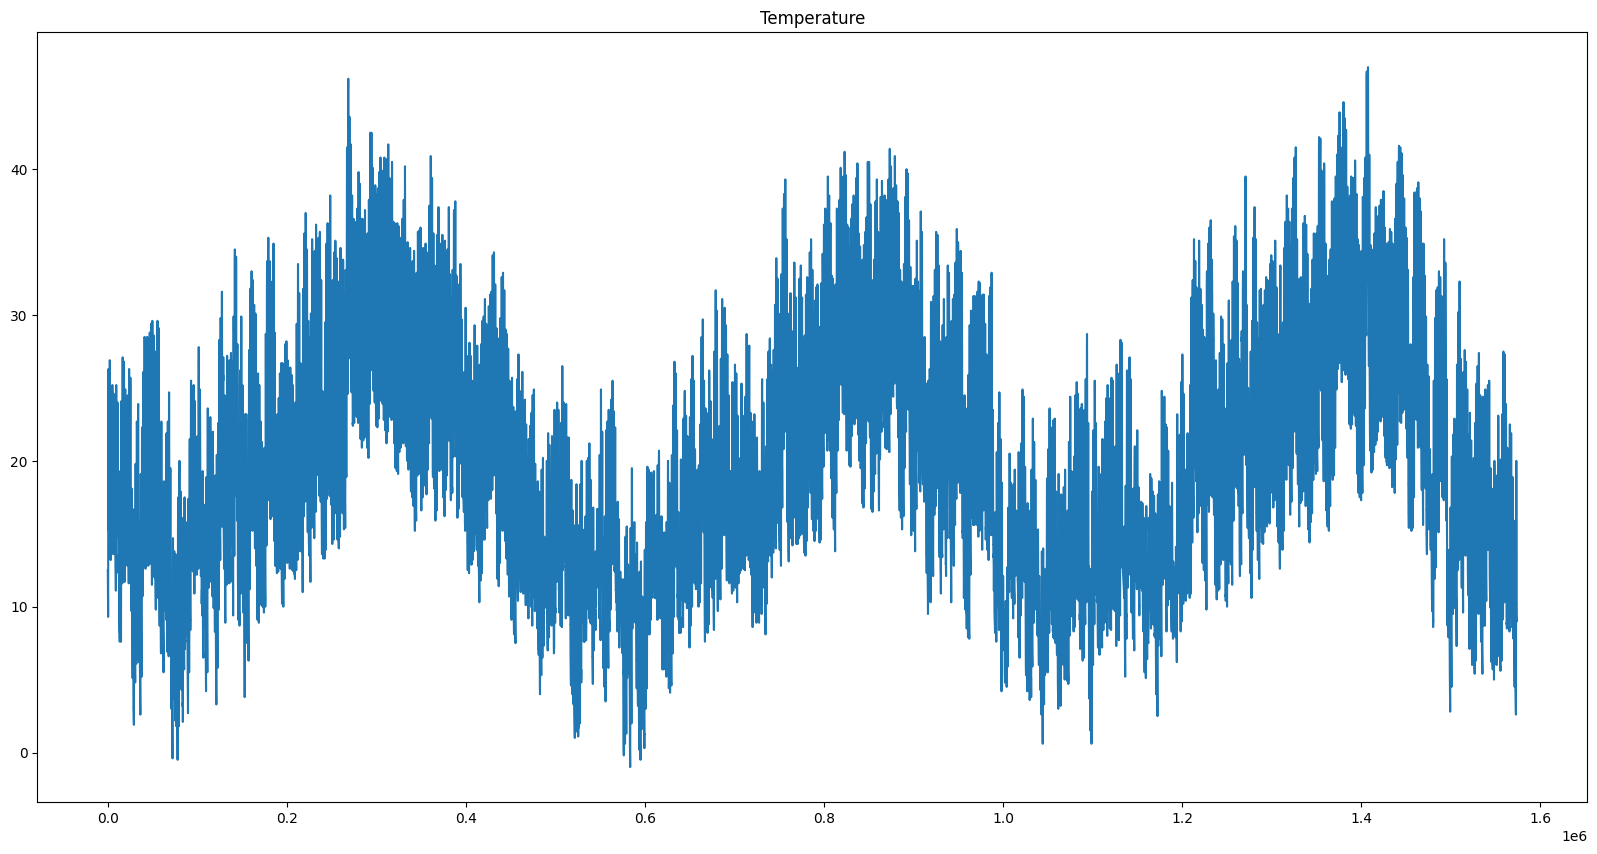

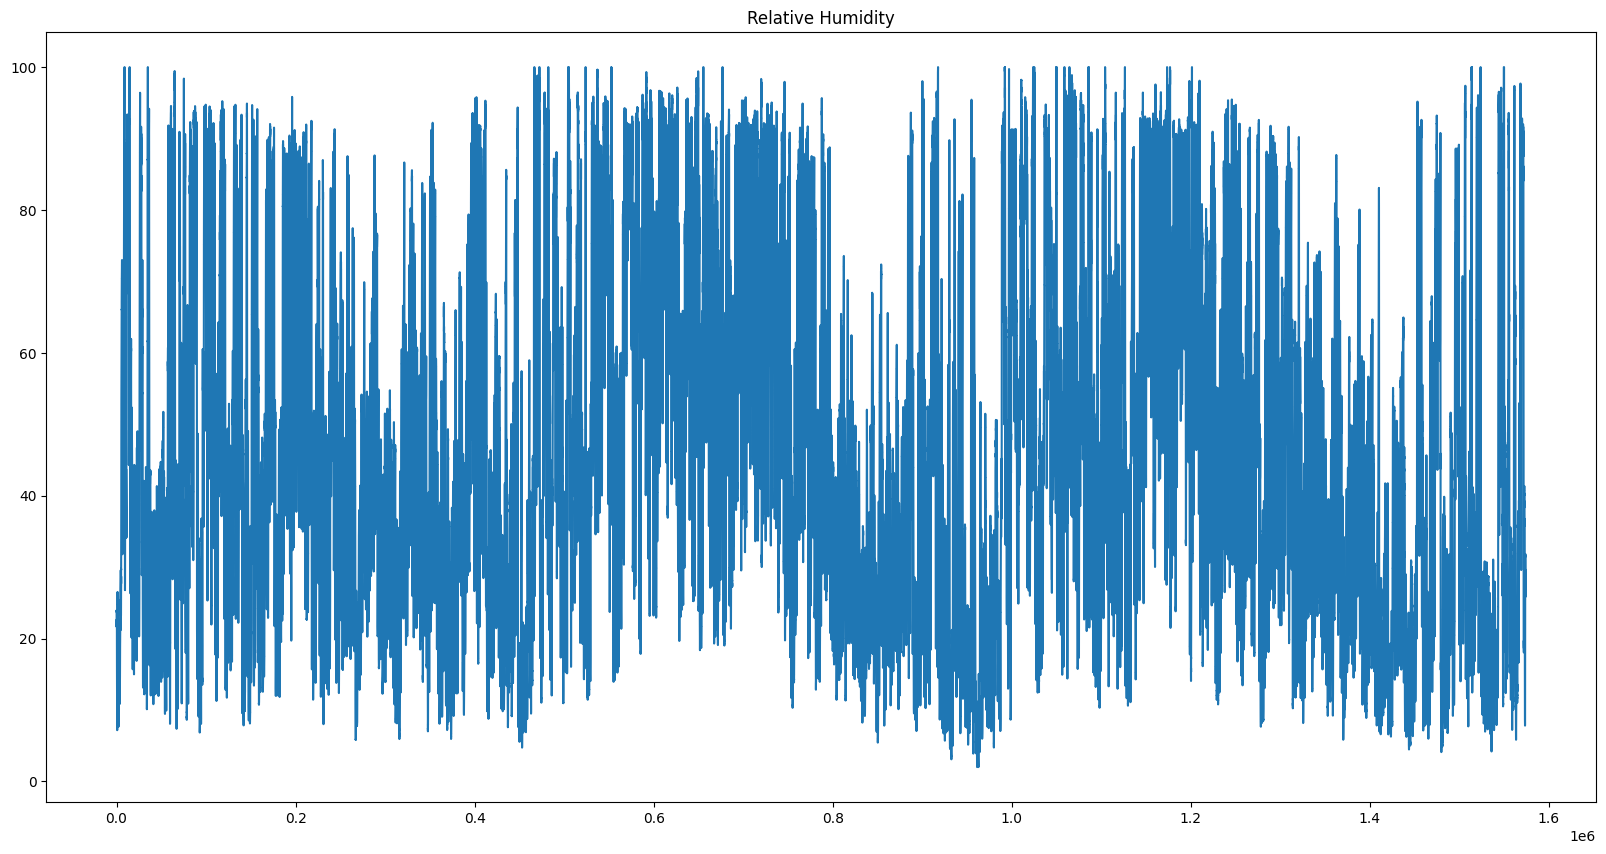

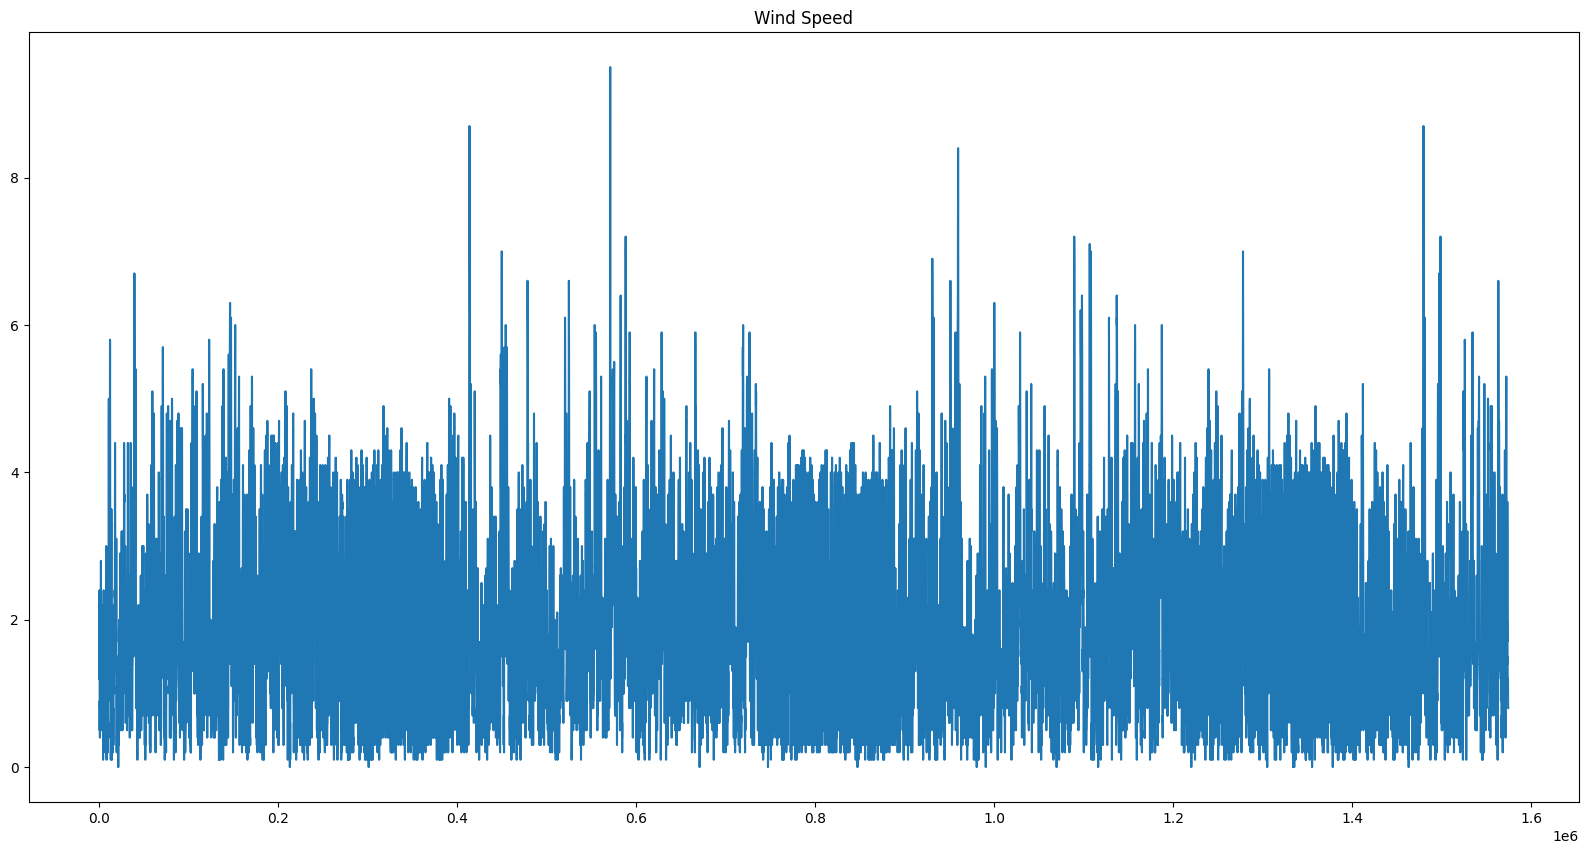

In [37]:
for attribute in attributes:
    if( attribute == 'time'):
        continue
    plt.figure(figsize=(20,10))
    plt.plot(df[attribute], label=attribute)
    plt.title(attribute)